### Recall the code from last week where we plotted a pre and post-PCA graph on one electrode:

[[  0.00000000e+00   4.26875839e+01  -4.16216049e+01 ...,   5.37767315e+00
   -4.36191063e+01  -3.24202118e+01]
 [  0.00000000e+00   4.27021294e+01  -4.14958229e+01 ...,   5.48104620e+00
   -4.34563637e+01  -3.23591118e+01]
 [  0.00000000e+00   4.26606216e+01  -4.14280090e+01 ...,   5.48846245e+00
   -4.33893471e+01  -3.22913055e+01]
 ..., 
 [  0.00000000e+00   5.55818176e+00   7.36358166e-02 ...,   2.97115827e+00
   -1.76444924e+00  -2.10357499e+00]
 [  0.00000000e+00   5.46442366e+00  -2.94206440e-02 ...,   2.82475162e+00
   -1.83129156e+00  -2.12265682e+00]
 [  0.00000000e+00   5.33126068e+00  -1.87894136e-01 ...,   2.61322021e+00
   -1.94846594e+00  -2.14896917e+00]]
(19999, 110)


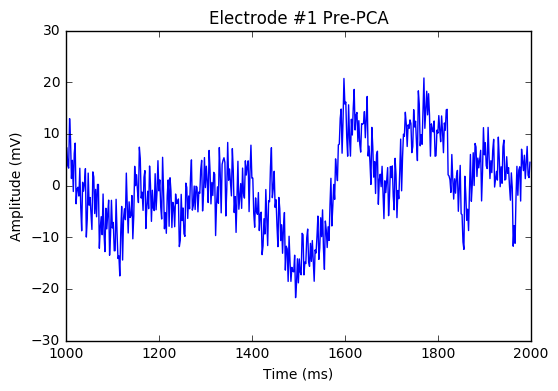

Eigenvalues:
[ 0.43069819  0.30114761  0.11133576  0.05852771  0.02602556  0.0190114
  0.01486085  0.00827173  0.00539682  0.00513844]


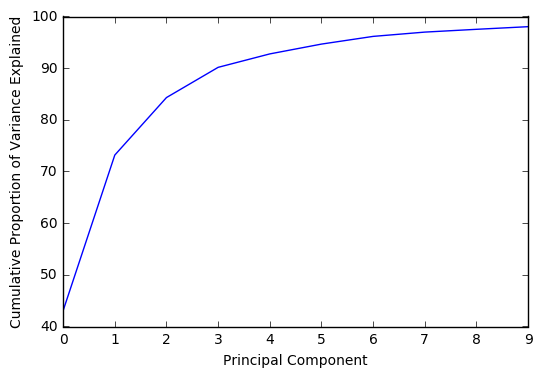

(19999L, 10L)
31.9467
[ 20.22812653  19.85704041  19.09459686 ...,  16.24412537  11.23039246
  47.71730423]


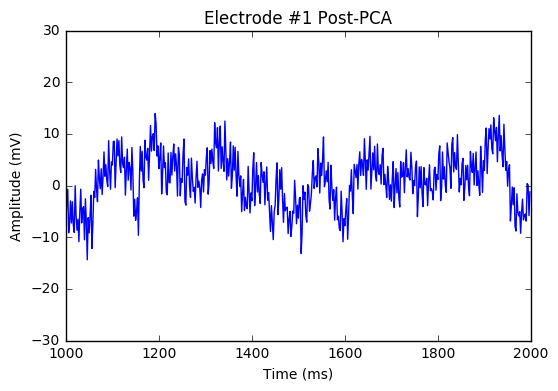

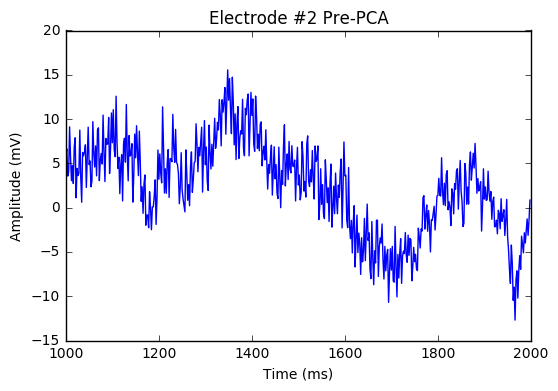

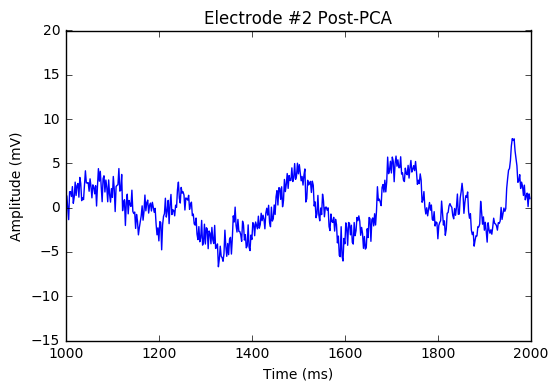

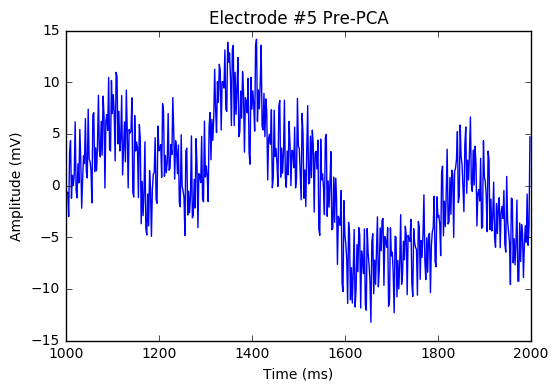

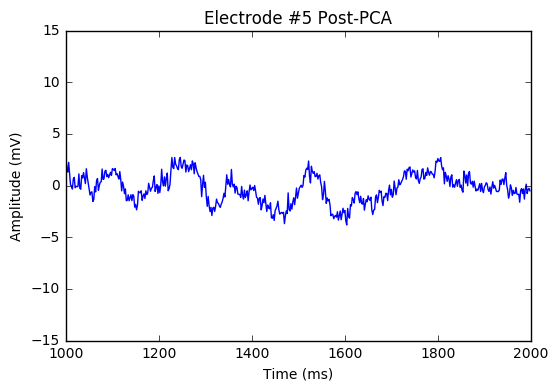

In [19]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets
from scipy import stats
from sklearn.preprocessing import scale
import pandas as pd

f = h5py.File('Documents/full_A00051826_01.mat', 'r')
data1 = np.array((f['result']['data']))
print data1
data_range = data1[500:1000,1];
data_range2 = data1[500:1000,2];
data_range5 = data1[500:1000, 5];
data1 = pd.DataFrame(data=data1[1:20000,1:],    # values
              index=data1[1:20000,0],    # 1st column as index
              columns=data1[0,1:]) 
print data1.shape
x = range(1000,2000,2)
plt.plot(x, data_range)
plt.title('Electrode #1 Pre-PCA')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')
plt.show()

X = data1.values
W = X.T
X = scale(X)
pca = PCA(n_components=10)
pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

print "Eigenvalues:"
print var

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Proportion of Variance Explained")
plt.show()

Y = pca.fit_transform(X)
print Y.shape
print pca.score(X)
print pca.score_samples(X)

y_range = Y[500:1000, 1];
x1 = range(1000,2000,2)
plt.plot(x1, y_range)
plt.title('Electrode #1 Post-PCA')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')
plt.axis([1000,2000,-30,30])
plt.show()

x = range(1000,2000,2)
plt.plot(x, data_range2)
plt.title('Electrode #2 Pre-PCA')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')
plt.show()

y_range = Y[500:1000, 2];
x1 = range(1000,2000,2)
plt.plot(x1, y_range)
plt.title('Electrode #2 Post-PCA')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')
plt.axis([1000,2000,-15,20])
plt.show()

x = range(1000,2000,2)
plt.plot(x, data_range5)
plt.title('Electrode #5 Pre-PCA')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')
plt.show()

y_range = Y[500:1000, 5];
x1 = range(1000,2000,2)
plt.plot(x1, y_range)
plt.title('Electrode #5 Post-PCA')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')
plt.axis([1000,2000,-15,15])
plt.show()

## Now we are going to look at the Profile Likelihood Model in which we can automatically determine where the "elbow" of the cumulative proportion of variance explained should be cut off:

In [15]:
print X.shape
MaximumLikelihood = max(pca.score_samples(X))
MinimumLikelihood = min(pca.score_samples(X))
print MaximumLikelihood
print MinimumLikelihood

(19999L, 110L)
73.115
-70.4788


For some reason our package only has functions on the rows of the data and not the actual columns (dimensions), BUT we can see that q = 2, and if we use q = 2, then we can see that:

[ 0.43069819  0.30114761]


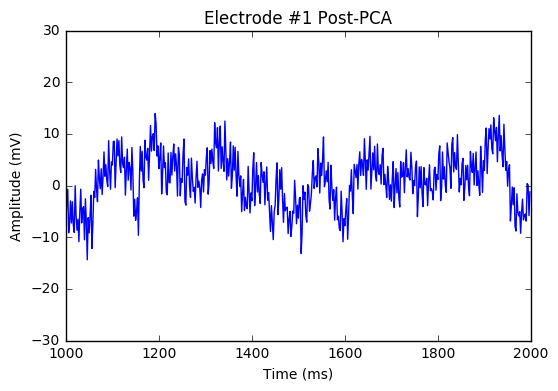

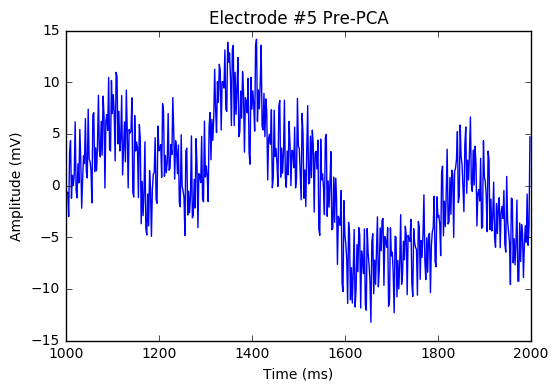

IndexError: index 5 is out of bounds for axis 1 with size 2

In [23]:
X = data1.values
W = X.T
X = scale(X)
pca = PCA(n_components=2)
pca.fit(X)

varnew = pca.explained_variance_ratio_ 
print varnew

Y = pca.fit_transform(X)

y_range = Y[500:1000, 1];
x1 = range(1000,2000,2)
plt.plot(x1, y_range)
plt.title('Electrode #1 Post-PCA')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')
plt.axis([1000,2000,-30,30])
plt.show()

x = range(1000,2000,2)
plt.plot(x, data_range5)
plt.title('Electrode #5 Pre-PCA')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')
plt.show()

y_range = Y[500:1000, 5];
x1 = range(1000,2000,2)
plt.plot(x1, y_range)
plt.title('Electrode #5 Post-PCA')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')
plt.axis([1000,2000,-15,15])
plt.show()
